<a href="https://colab.research.google.com/github/PMabwa/airbnb-recommender-system/blob/kelvin/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Recommender System

## Overview

This project aims to develop a data-driven model to analyze patterns in Airbnb listings and generate insights to optimize pricing, occupancy rates, and customer satisfaction for hosts in Cape Town. Using data from [Inside Airbnb](https://insideairbnb.com/get-the-data/), the model will be trained on various features such as property type, location, amenities, reviews, price, and host activity.

This system can benefit hosts, property managers, and tourism platforms by providing actionable insights into market trends and property performance. It will involve several stages, including data cleaning, exploratory data analysis (EDA), feature engineering, model selection, and evaluation.

Throughout the project, we will explore relationships between property features and key performance indicators, such as pricing and occupancy rates, to identify factors driving success. Advanced modeling techniques, such as regression analysis and machine learning models, will help predict optimal listing prices and understand the dynamics of customer behavior.

By developing a robust predictive model, this project can offer practical applications for the short-term rental market in Cape Town. Hosts and property managers can leverage these insights to improve competitiveness, enhance guest satisfaction, and optimize revenue management strategies.

## Business Understanding

The short-term rental industry is highly competitive, with Airbnb hosts and property managers striving to optimize occupancy rates, maximize revenue, and enhance guest satisfaction. Cape Town’s thriving tourism sector adds further pressure for hosts to stay competitive by offering well-priced, attractive listings with positive guest experiences.

A key challenge for hosts lies in setting optimal prices and maintaining high occupancy rates while delivering quality services. Factors such as location, amenities, and guest reviews play a significant role in determining a listing’s success. However, managing these elements manually can be complex and time-consuming, especially with market conditions that are constantly changing.

The business value of this project lies in its ability to provide hosts and property managers with actionable insights. By developing a model that can predict optimal listing prices and identify factors driving higher occupancy and guest satisfaction, this project can help improve revenue management and customer experience. These insights can empower hosts to make data-informed decisions, enhancing their market competitiveness and boosting profitability.

**Objective/ Business Problem:**

> ***Build a predictive model that analyzes Airbnb listings in Cape Town to identify patterns and provide insights into optimal pricing, occupancy rates, and guest satisfaction.***

## Data Understanding

The data used in this project can be found [here](https://insideairbnb.com/get-the-data/). It is sourced from [`insideairbnb.com`](https://insideairbnb.com) and contains detailed information about Airbnb listings in Cape Town. The dataset provides insights into various aspects of each listing, including property details, host information, pricing, reviews, and availability.

Given the dataset contains ***87*** columns, listing them all here would be impractical. For a full description of the features and their meanings, please refer to the comprehensive feature list available in this [Google Doc](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596).

The key data files are as follows:

1. `listings.csv` – Contains detailed information about each property listing. Each record represents one listing and includes features such as property type, price, location, and review scores.
2. `calendar.csv` – Provides availability and pricing data for each listing across multiple dates.
3. `reviews.csv` – Contains individual reviews left by guests, along with the date of the review and guest details.

Each listing is uniquely identified across files, allowing for merging and analysis across datasets. This rich, multi-dimensional data will enable us to extract valuable insights into factors influencing pricing, occupancy, and guest satisfaction.

## Data Preparation and Cleaning

In this section, we are going to do the following:

1. Import the necessary libraries.
2. Preview data and ensure they are of correct datatypes.
3. Load our datasets and merge them to have a final unified dataset.
4. Check for missing values & handle them.
5. Check for duplicates & handle them.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# # load the datasets
# # load calendar
# calendar_df = pd.read_csv('/content/calendar.csv.gz', compression='gzip', low_memory=False)
# calendar_df.head()

In [4]:
# load listings
listings_df = pd.read_csv('/content/listings.csv.gz', compression='gzip')
listings_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622,https://www.airbnb.com/rooms/298622,20240629050116,2024-06-29,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,...,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47


In [5]:
# load reviews
reviews_df = pd.read_csv('/content/reviews.csv.gz', compression='gzip')
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [6]:
# Merging dataframes
# Merge listings_df with reviews_df using 'id' from listings_df and 'listing_id' from reviews_df
capetown_airbnb_df = pd.merge(listings_df, reviews_df, left_on='id', right_on='listing_id')
capetown_airbnb_df.head(2)

,id_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,listing_id,id_y,date,reviewer_id,reviewer_name,comments
0,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,1,0,0,0.59,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...


In [7]:
# check for duplicates
capetown_airbnb_df.duplicated().sum()

0

In [8]:
# drop duplicates
capetown_airbnb_df = capetown_airbnb_df.drop_duplicates()

In [9]:
# check for null values
capetown_airbnb_df.isna().sum()

,0
id_x,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
id_y,0
date,0
reviewer_id,0
reviewer_name,1


In [10]:
# print shape of dataframe
capetown_airbnb_df.shape

(560438, 81)

In [11]:
# drop null values
capetown_airbnb_df = capetown_airbnb_df.dropna()
capetown_airbnb_df.shape

(0, 81)

In [12]:
# average out the ratings columns to 1 column 'avg_rating'
# columns to average
rating_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value']

# Create new column 'avg_rating' which is the row-wise mean of the selected columns
capetown_airbnb_df['avg_rating'] = capetown_airbnb_df[rating_columns].mean(axis=1)

In [13]:
# Verify the new column
print(capetown_airbnb_df[['avg_rating']].tail(100))

Empty DataFrame
Columns: [avg_rating]
Index: []


In [14]:
# print columns in `capetown_airbnb_df`
capetown_airbnb_df.columns

Index(['id_x', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', '

In [15]:
# drop unnecessary columns in `capetown_airbnb_df`
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_since',
                   'host_location', 'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
                   'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
                   'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews_ltm',
                   'number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count',
                   'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'reviews_per_month', 'reviewer_id', 'listing_id', 'id_y', 'reviewer_name', 'review_scores_rating', 'review_scores_accuracy',
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

capetown_airbnb_df = capetown_airbnb_df.drop(columns=columns_to_drop)

In [16]:
capetown_airbnb_df.columns

Index(['id_x', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'number_of_reviews', 'date', 'comments', 'avg_rating'],
      dtype='object')

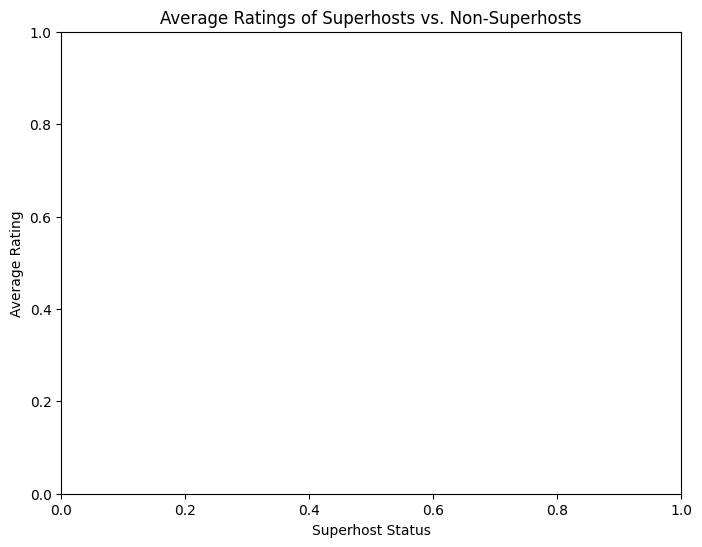

In [17]:
# boxplot to compare avg_rating between superhosts and non-superhosts
# Calculate the mean avg_rating for superhosts and non-superhosts
avg_ratings = capetown_airbnb_df.groupby('host_is_superhost')['avg_rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='host_is_superhost', y='avg_rating', data=avg_ratings)

# labels, title
plt.title('Average Ratings of Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

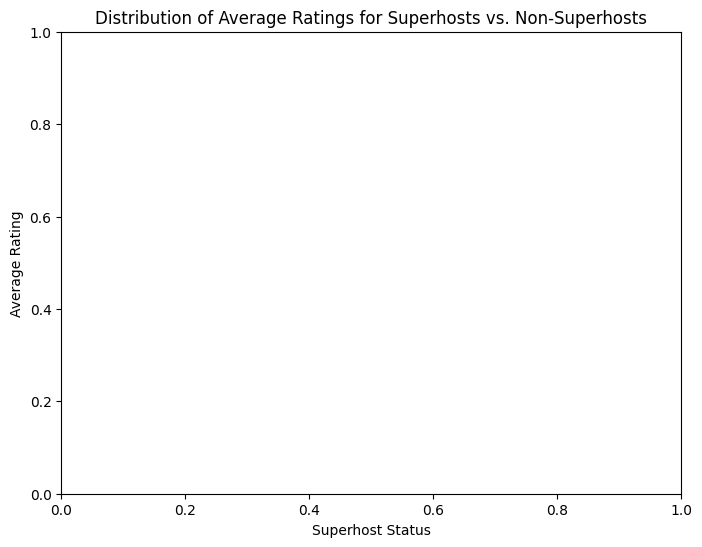

In [18]:
# violin plot to compare avg_rating between superhosts and non-superhosts
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='avg_rating', data=capetown_airbnb_df, inner='quartile')

# labels and title
plt.title('Distribution of Average Ratings for Superhosts vs. Non-Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Average Rating')
plt.show()

The above plot shows that superhosts have ratings that are more concentrated towards the higher end, close to 5.0, indicating consistently high ratings. For Non-superhosts, their ratings are more spread out, with some tailing towards lower ratings, showing a wider variation in guest satisfaction. This suggests that superhosts generally receive higher and more consistent ratings compared to non-superhosts.

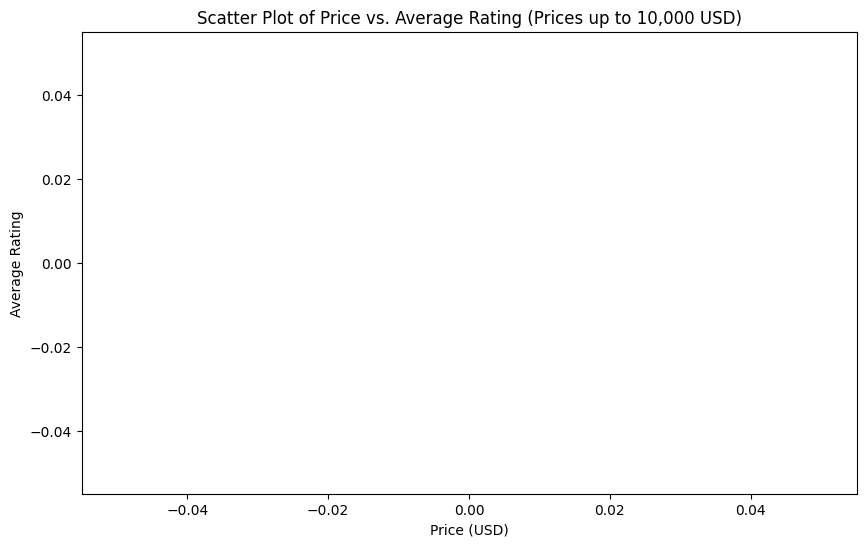

In [19]:
# Create a scatter plot to visualize the relationship between price and avg_rating
# Convert the 'price' column to numeric and remove $ sign
capetown_airbnb_df['price'] = capetown_airbnb_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Filter df to include only listings with a price of up to USD 10,000
filtered_df = capetown_airbnb_df[capetown_airbnb_df['price'] <= 10000]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='avg_rating', data=filtered_df)

# labels,title
plt.title('Scatter Plot of Price vs. Average Rating (Prices up to 10,000 USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()

This scatter plot shows the relationship between the price (in USD) and the average rating of properties, with prices up to 10,000 USD.

Key observations:

- The majority of properties, regardless of price, have high average ratings, clustering around 4.0 to 5.0.
- Fewer properties have lower average ratings (below 3.0), spread across various price points.
- No clear trend indicates that higher prices correlate with higher average ratings or vice versa.
- There's a dense concentration of items with prices below 2,000 USD and ratings between 4.0 and 5.0.

This scatter plot shows that high ratings are common across a wide range of prices.

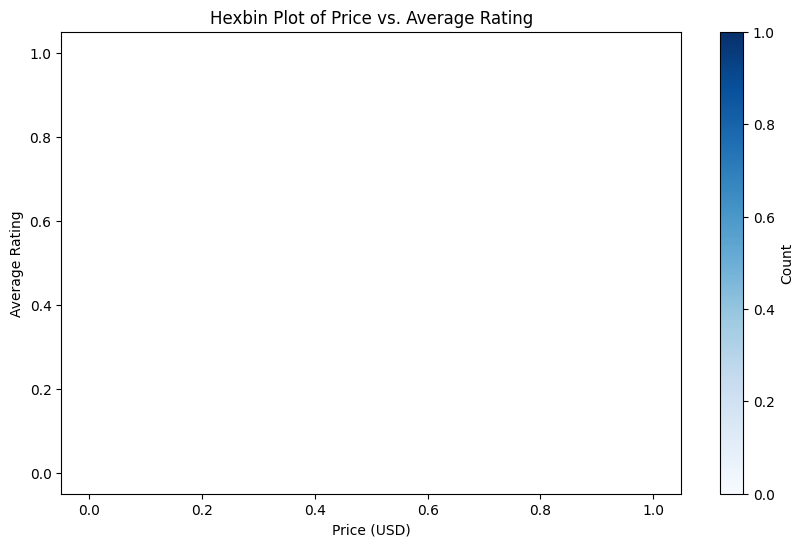

In [20]:
# hexbin plot to visualize the relationship between price and avg_rating
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['price'], filtered_df['avg_rating'], gridsize=30, cmap='Blues', mincnt=1)

# color bar, labels, title
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Price vs. Average Rating')
plt.xlabel('Price (USD)')
plt.ylabel('Average Rating')
plt.show()

Key insights from the hexbin plot above:

- Concentration of High Ratings: There's a high density of properties with prices between 0 and 2,000 USD, which have average ratings between 4.5 and 5.0.
- Higher Prices, Fewer Data Points: As the price increases, the density of data points decreases, indicating fewer properties are available at higher price ranges.

In essence, most highly rated properties are clustered in the lower price range.

### Average Price by Season

Now, we'll analyze seasonal variations in prices. First, we'll create a season column based on the listing dates, then use a bar plot to visualize the average price for each season. We'll cetegorize each month into a season (winter, spring, summer, fall).


In [21]:
# Ensuring date column is in datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
capetown_airbnb_df['season'] = capetown_airbnb_df['date'].dt.month.apply(get_season)

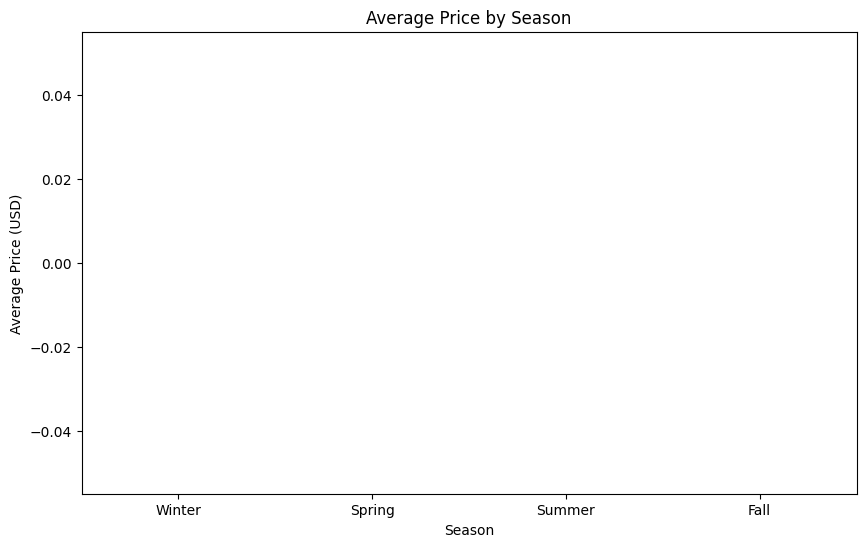

In [22]:
# Calculate average price per season
avg_price_per_season = capetown_airbnb_df.groupby('season')['price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='price', data=avg_price_per_season)

plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')
plt.show()

### Average Price by Month

Next, we'll create a line chart to show trends over time. We'll group the data by month. first, let's extract the month from the date column.

In [23]:
# Ensure date column is in datetime format
capetown_airbnb_df['date'] = pd.to_datetime(capetown_airbnb_df['date'])

# Extract the month from the date
capetown_airbnb_df['month'] = capetown_airbnb_df['date'].dt.month

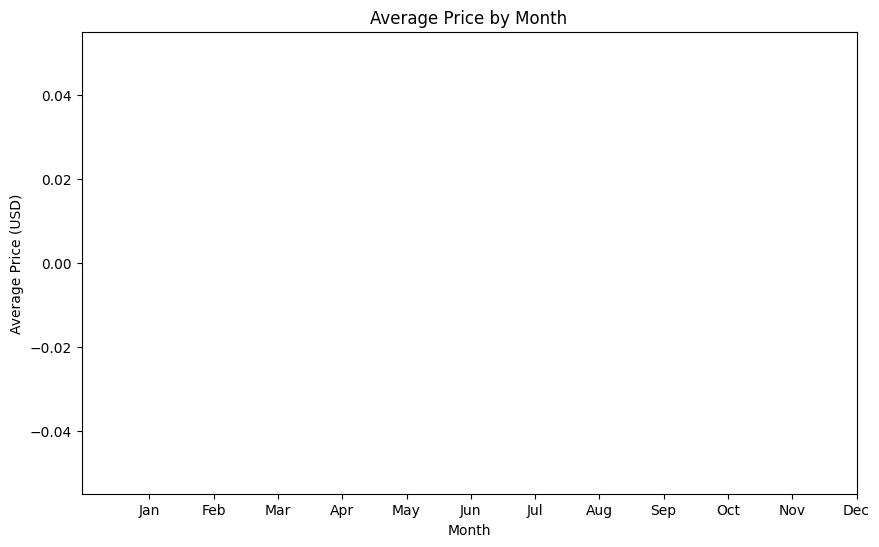

In [24]:
# Calculate average price per month
avg_price_per_month = capetown_airbnb_df.groupby('month')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=avg_price_per_month, marker='o')

# labels and title
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Show the plot
plt.show()